In [35]:
import os, sys
#Basic Data Statics
#Raw File Count is : 5838923

In [36]:
#Globle variables
file_path = '/data/opinion_spam/real/reviewsNew.txt'




In [37]:
#Filter useless reviews
datas = []
MIN_FD = 100
data_count = 0
meanful_data_count = 0
raw_file = open(file_path)
for line in raw_file:    
    try:
        line = line.decode('gbk')
    except:
        continue
    #print 'gbk', line
    line = line.encode('utf-8')
    #print 'utf8', line
    item = line.split('\t')
    data_count += 1
    if len(item) == 8:
        hfd = float(item[3])
        fd = float(item[4])
        ratings = float(item[5])
        if fd > MIN_FD:
            meanful_data_count += 1
            hfdfd = round(hfd/fd, 2)
            #whole_filted_body += item[7]
            item.append(hfdfd)
            datas.append(item)
raw_file.close()
print 'data count is :' + str(data_count)
print 'meanful data size : '+ str(meanful_data_count)
print datas[0]

data count is :5836532
meanful data size : 19037
['A1004AX2J2HXGL', 'B00003CWPL', 'December 2, 2003', '111', '125', '5.0', '"But what the hell do they know, I said?"', ' If you\'re reading this, then you\'ve seen this movie or are at least curious what all the hype is about?    The late Stanley Kubrick, the only major filmmaker Lynch has cited as a direct cinematic influence, believed that ERASERHEAD was one of the most perfect "cinematic experiences" created to date.  This movie has enjoyed success on the midnight movie circuit for years, particularly in NYC where it ran almost every night for something like five years straight. I\'ve seen it on big and little screens in three different states.  Insofar as interpretations are concerned, I\'ve long since tossed all that out the window.  In terms of rational comprehension, ERASERHEAD is the fabled big fish that remains brilliantly elusive of any attempts to capture it.     This movie gets better, and more humorous, every time I watch it

In [38]:
#Transfer data into dataframe
import pandas as pd
col_names = ['rid', 'pid', 'date', 'hfd', 'fd', 'ratings', 'title', 'body', 'hfdfd']

df = pd.DataFrame(data = datas, columns = col_names)
#Relocate the data type
df[['hfd', 'fd','ratings']] = df[['hfd', 'fd', 'ratings']].astype(float)
#df['ratings'] = df['ratings'].astype(int)
print df.dtypes
df

rid         object
pid         object
date        object
hfd        float64
fd         float64
ratings    float64
title       object
body        object
hfdfd      float64
dtype: object


,rid,pid,date,hfd,fd,ratings,title,body,hfdfd
0,A1004AX2J2HXGL,B00003CWPL,"December 2, 2003",111,125,5,"""But what the hell do they know, I said?""","If you're reading this, then you've seen this...",0.89
1,A103PHKSEPT10R,0939484463,"July 5, 2000",69,116,5,"Credible, Interesting, & Devasting",I've read Prof Butz's book twice and an still...,0.59
2,A103U0Q3IKSXHE,0875845851,"January 29, 2000",111,115,4,Identifying the horns of the dilemma.,"Prior to reading this book, I chalked up the ...",0.97
3,A105YVLAZNYQUU,B000634DCW,"June 21, 2005",6,112,1,UGGHHH,Craptacular and boring. The cinematography an...,0.05
4,A1075MZNVRMSEO,1563249367,"April 2, 2002",190,190,5,A historical portrait & revelation- un chin de...,This book is a fascinating journey through th...,1.00
5,A108H0RI2LWLUO,B00004WHIL,"August 22, 2000",177,181,3,"nice unit, but wireless is expensive and slow","If you can afford the...wireless, and realize...",0.98
6,A10DE6RF8970ET,B0007XHLZM,"May 22, 2005",133,137,4,"A little more, and a little smaller than the o...",6/4/05 - Addendum There's no backlight on the...,0.97
7,A10ETSMF2H8QG2,B000056JBO,"April 7, 2002",108,113,5,Great Buy!,Even though this is one of the cheaper matres...,0.96
8,A10EW5N83RTO27,0195102797,"April 6, 2000",98,158,4,a necessary challenge to fundamentalism,Ehrman is doing for the New Testament what sc...,0.62
9,A10EW5N83RTO27,0060738170,"December 14, 2005",67,152,5,If people would only take biblical scholarship...,I just emailed Prof. Ehrman that had I been a...,0.44


In [39]:
#State the hfd/fd and ratings
#ratings
%matplotlib inline
import matplotlib.pyplot as plt


/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


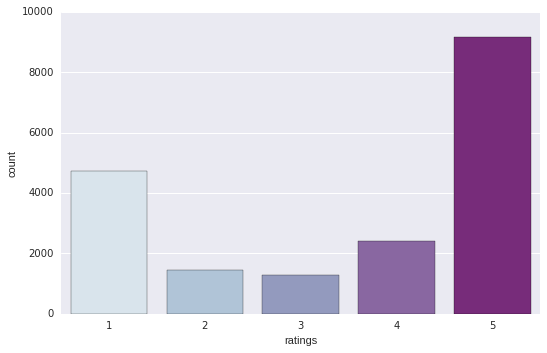

In [40]:
import seaborn as sns
ratings_range = range(1, 6)
g = sns.factorplot(x = 'ratings', data=df, kind='count', palette='BuPu', size=5, aspect=1.5, 
                   order=ratings_range)

In [41]:
import matplotlib
print 'matplotlib.get_backend(): ' + matplotlib.get_backend()


matplotlib.get_backend(): module://ipykernel.pylab.backend_inline


In [42]:
#show the hfd/fd distribution

#add new column to df
#df['hfd/fd'] = (round(df['hfd']/df['fd'], 2)).astype(float)
#df['hfd/fd'] = (df['hfd'] * 100 /df['fd']).astype(float)
#df['hfd/fd'] = (df['hfd/fd']).astype(int)
#df['hfd/fd'] = (df['hfd/fd']/100).astype(float)
#df
#new_df = df[df["fd"] > 10]
#new_df



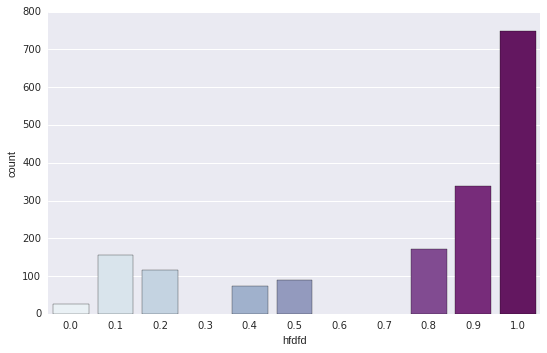

In [43]:
import numpy as np
hfd_range = np.arange(0, 1.1, step=0.1)

g = sns.factorplot(x = 'hfdfd', data=df, kind='count', palette='BuPu', size=5, aspect=1.5, order=hfd_range, row_order=hfd_range)


In [44]:
#Transfer into label with body
tdf = df[['hfdfd', 'body']]
print tdf.dtypes
tdf

hfdfd    float64
body      object
dtype: object


,hfdfd,body
0,0.89,"If you're reading this, then you've seen this..."
1,0.59,I've read Prof Butz's book twice and an still...
2,0.97,"Prior to reading this book, I chalked up the ..."
3,0.05,Craptacular and boring. The cinematography an...
4,1.00,This book is a fascinating journey through th...
5,0.98,"If you can afford the...wireless, and realize..."
6,0.97,6/4/05 - Addendum There's no backlight on the...
7,0.96,Even though this is one of the cheaper matres...
8,0.62,Ehrman is doing for the New Testament what sc...
9,0.44,I just emailed Prof. Ehrman that had I been a...


In [45]:
#Fit TFIDF model
import nltk
import re
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english")

#去掉标点符号
def tokenize_and_stem(text):
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered = []
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered.append(token)
    stems = []
    for t in filtered:
        tt = stemmer.stem(t)
        if tt not in stems:
            stems.append(tt)
    return stems

test_str = 'I haved two dreams.'
print type(test_str)


tokenize_and_stem(test_str)




<type 'str'>


['i', u'have', u'two', u'dream']

In [46]:
import codecs
#print 'whole_filted_body:'+ str(len(whole_filted_body))

#how to save file with utf-8
#Save the text file to disk and analysis error
#_outfile = codecs.open('/tmp/_outfile_whole_filted_body', 'w', 'utf-8')
#_outfile.write(whole_filted_body)
#_outfile.close
#print 'output file over'

#whole_filted_body = filter_non_English(whole_filted_body)
#english_only = ''.join(x for x in whole_filted_body if ord(x) < 256)

#print 'filted non english characters, whole body : ', str(len(english_only))
#print blist


In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer


#tfidf = TfidfVectorizer(max_df=0.5, max_features=200000,
#                        min_df=1, stop_words='english',
#                        tokenizer=tokenize_and_stem, ngram_range=(1, 1))

tfidf = TfidfVectorizer(max_df=0.8, max_features=5000,
                        min_df=0.05, stop_words='english',
                        tokenizer=tokenize_and_stem, ngram_range=(1, 1))
print tfidf

#########################
blist = []

for bbb in tdf.body:
    xxx = ''.join(x for x in bbb if ord(x) < 128)
    blist.append(xxx)
print type(blist)
#########################

print 'length: ', len(blist)

#blist = ['haha, i am in beijing', 'hoho, i am in shanghai', 'haha', 'hoho', 'beijing is great']
print type(blist)

tfidf_mat = tfidf.fit_transform(blist)

print tfidf_mat.shape

 TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=0.8, max_features=5000, min_df=0.05,
        ngram_range=(1, 1), norm=u'l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=<function tokenize_and_stem at 0x7f2309f18aa0>,
        use_idf=True, vocabulary=None)
<type 'list'>
length:  19037
<type 'list'>
(19037, 437)


In [48]:
# dunnscore的评估函数，输入点集的矩阵表示vectors、已经分好类的标记tag
# 输出评分值
def dunnscore(vectors, tag):
    ncluster = max(tag) + 1
    clusters = [[] for x in range(ncluster)]
    #将输入的稀疏矩阵转化为紧密矩阵
    vectors = vectors.todense()
    for i in range(0, vectors.shape[0]):
        clusters[tag[i]].append(vectors[i])
    #聚类中心
    cent = []
    for a in clusters:
        cent.append(np.mean(a, axis=0))
    #各个簇的直径
    diam = []

    for a in clusters:
        big = []
        for i in range(0, len(a)):
            for j in range(0, len(a)):
                big.append(distance.euclidean(a[i], a[j]))
        diam.append(max(big))

    cross = []
    for i in range(ncluster):
        for j in range(i + 1, ncluster):
            cross.append(distance.euclidean(cent[i], cent[j]))
    return min(cross) / max(diam)

#davies boulding的评分值
#输入、输出同上
def davies(vectors, tag):
    ncluster = max(tag) + 1
    clusters = [[] for x in range(ncluster)]
    vectors = vectors.todense()
    for i in range(vectors.shape[0]):
        clusters[tag[i]].append(vectors[i])
    cent = []

    for a in clusters:
        cent.append(np.mean(a, axis=0))

    diam = []
    for c in clusters:
        tp = []
        for node1 in c:
            for node2 in c:
                tp.append(distance.euclidean(node1, node2))
        diam.append(max(tp))

    for a in clusters:
        tp = []
        for node1 in c:
            for node2 in c:
                tp.append(distance.euclidean(node1, node2))
    cros = []

    res = 0
    for i in range(ncluster):
        tp = []
        for j in range(ncluster):
            if i == j:
                continue
            tp.append((diam[i] + diam[j]) / (distance.euclidean(cent[i], cent[j])))
        res += max(tp)
    return res / ncluster

In [51]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial import distance
##KMeans
for i in range(2, 20):
    km = KMeans(i)
    #调用聚类函数聚类，得到一个打好标签的labels
    km.fit(tfidf_mat)
    tag = km.labels_.tolist()
    #silhouette评分是系统自带的

    print "k = ",i, "runs : ", "dunnscore", dunnscore(tfidf_mat, tag), "davies", davies(tfidf_mat, tag), "silhouette", metrics.silhouette_score(
        tfidf_mat, km.labels_, metric="euclidean")
    #print("Silhouette Coefficient: %0.3f"
     # % metrics.silhouette_score(tfidf_mat, km.labels_, sample_size=50))

k =  2 runs :  dunnscore 0.150290659491 davies 13.3075469012 silhouette 0.0113177619535
k =  3 runs :  dunnscore 0.150363323389 davies 12.8214219094 silhouette 0.00361940982307
k =  4 runs :  dunnscore 0.151294808034 davies 12.8848501352 silhouette 0.00457259848065
k =  5 runs :  dunnscore 0.153787571705 davies 12.5714691318 silhouette 0.00319254509351
k =  6 runs :  dunnscore 0.147254606081 davies 12.0217578297 silhouette 0.00380102899935
k =  7 runs :  dunnscore 0.141419114148 davies 12.7948703574 silhouette 0.00253873139369
k =  8 runs :  dunnscore 0.14425229925 davies 12.8642073302 silhouette 0.000972077913197
k =  9 runs :  dunnscore 0.144969131135 davies 12.7770547421 silhouette 0.000288742560353
k =  10 runs :  dunnscore 0.142165760381 davies 12.3514608536 silhouette 0.00143771823532
k =  11 runs :  dunnscore 0.146810187687 davies 12.3664683295 silhouette 0.00115520999606
k =  12 runs :  dunnscore 0.148267472405 davies 12.1540042876 silhouette -0.000138967168068
k =  13 runs :  